In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

### 测试数据

In [3]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
mask = np.random.uniform(0, 1, size=iris.shape)
mask[:, [1, 4]] = 1
mask = mask < 0.3

iris_nan = iris.copy()
iris_nan[mask] = np.nan

In [71]:
iris_nan.head()
# iris_nan.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,NaN,setosa
1,4.9,3.0,1.4,NaN,setosa
2,4.7,3.2,1.3,NaN,setosa
3,4.6,3.1,NaN,0.2,setosa
4,5.0,3.6,NaN,0.2,setosa


### 打乱数据顺序(shuffle)

In [87]:
iris_nan = iris_nan.sample(frac=1).reset_index(drop=True)
iris_nan.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,2.8,5.6,2.2,virginica
1,6.4,3.2,5.3,2.3,virginica
2,5.5,3.5,1.3,NaN,setosa
3,NaN,2.9,3.6,1.3,versicolor
4,6.7,3.3,5.7,NaN,virginica


### 缺失值操作 NA

In [72]:
iris_nan.loc[0].hasnans

True

In [73]:
iris_nan.isna().head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,True,False,False,True,False
1,False,False,False,True,False


In [74]:
iris_nan.isnull().sum()

sepal_length    49
sepal_width      0
petal_length    50
petal_width     52
species          0
dtype: int64

In [83]:
dummy = iris_nan.dropna(axis=0)
print(dummy.shape)

dummy = iris_nan.dropna(axis=1)
print(dummy.shape)

dummy = iris_nan.dropna(axis=1, how="all")
print(dummy.shape)

(44, 5)
(150, 2)
(150, 5)


In [84]:
iris_nan.fillna({"petal_width": 0}).head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,0.0,setosa
1,4.9,3.0,1.4,0.0,setosa
2,4.7,3.2,1.3,0.0,setosa
3,4.6,3.1,NaN,0.2,setosa
4,5.0,3.6,NaN,0.2,setosa


### 最频繁的元素
The [mode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html) of a set of values is the value that appears most often. It can be multiple values.

In [76]:
iris.mode().loc[0]

sepal_length       5.0
sepal_width        3.0
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

### 按类型选取列

In [77]:
iris.select_dtypes(include=["float64"], exclude=["object"]).head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [78]:
iris.select_dtypes(include=["object"]).head(2)

,species
0,setosa
1,setosa


### 对类型变量one-hot编码

In [89]:
pd.get_dummies(iris_nan, columns=["species"]).head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,NaN,2.8,5.6,2.2,False,False,True
1,6.4,3.2,5.3,2.3,False,False,True
2,5.5,3.5,1.3,NaN,True,False,False
3,NaN,2.9,3.6,1.3,False,True,False
4,6.7,3.3,5.7,NaN,False,False,True


k-1 one-hot encoding

In [90]:
pd.get_dummies(iris_nan, columns=["species"], drop_first=True).head()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,NaN,2.8,5.6,2.2,False,True
1,6.4,3.2,5.3,2.3,False,True
2,5.5,3.5,1.3,NaN,False,False
3,NaN,2.9,3.6,1.3,True,False
4,6.7,3.3,5.7,NaN,False,True


### hist直方图

对每列一个直方图

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

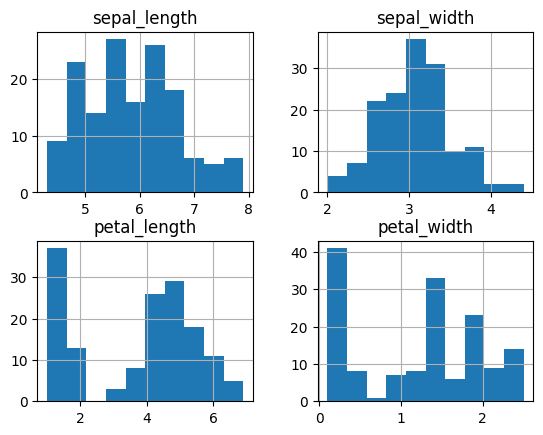

In [5]:
iris.hist()